# Central Limit Theorem
After this lesson, you will be able to:

- Create a sample means distribution
- Apply the central limit theorem to various distributions
- Appreciate the value of the central limit theorem in statistical analysis

We have been exploring distributions to determine if they can be considered "normal." Remember, that normality is a key assumption for parametric tests which are more powerful and easier to interpret than non-parametric tests. When we start doing hypothesis testing, we will want to be able to use parametric tests when possible.

The central limit theorem is a valuable discovery in statistics that opens up a world of hypothesis testing for us.  It states that a distribution made of sample means approximates a normal distribution, even if the underlying distribution of the original population is NOT normally distributed. Due to the central limit theorem, as long as our population is large enough (greater than 30), we can take advantage of tests that assume a normal distribution.  But how?


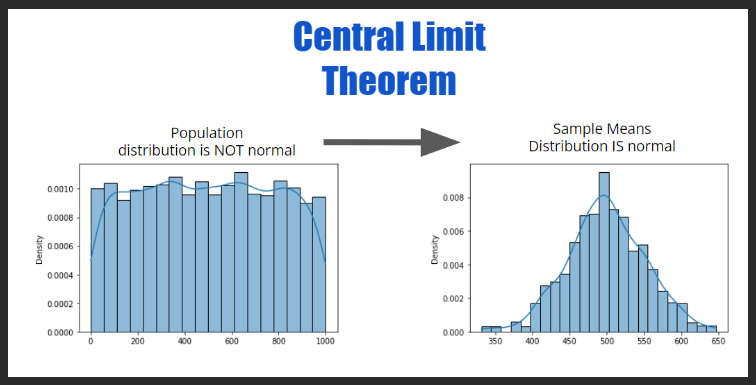

**What are sample means?**

The key to understanding central limit theorem is knowing what is meant by a distribution of "sample means."  In a previous lesson, we took several random samples from a population to demonstrate how a single random sample may or may not be representative of a population.  We also saw how much variation there can be from one random sample to another.  

To obtain a distribution of sample means requires taking many individual samples.  

Every time a sample is taken from the population, the mean of just that sample can be determined. The list of these means is known as the sample means. We can study this list of means just as we would study the distribution of any variable. For example, we can plot the distribution and find measures of central tendency and dispersion.  

We will demonstrate how to transition from a non-normal population distribution to a normal sample means distribution below.   For demonstration, we will first work with a simulated population, and then we will conclude with an exploration of our ongoing movie runtimes data as a real world example.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Example Simulated Population: A Uniform Distribution
To help you understand sample means and the central limit theorem, we will first walk through an example where we have purposefully created a non-normal distribution.  In this case, the distribution has a "uniform" distribution.

**Create the simulated population**

Numpy will create this simulated distribution for you by using np.random.uniform(). Set the seed to get reproducible results.

In [2]:
#choose values between 1-1000, choose 5000 values
np.random.seed(42)
uniform = np.random.uniform(1, 1000, 5000)

We now have a population distribution of 5000 values that is clearly not normal. You could do a normality test to confirm!  The distribution of the population is shown below.

**Visualize the population**

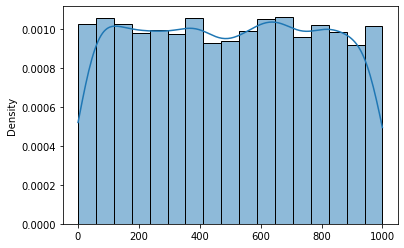

In [3]:
## Let's graph the density plot
sns.histplot(x=uniform,stat='density', kde=True);

**Create the list of sample means**

The following code takes 1000 different samples from our original population, finds the mean of each sample, and creates a list of these "sample means."

In [4]:
## loop to take 1000 samples of 30 and calculate the means of each sample
np.random.seed(42)
sample_means = []
for i in range(1000):    
  sample = np.random.choice(uniform,size=30,replace=False)    
  sample_means.append( np.mean(sample))
# Print the first 5 sample means
sample_means[0:5]

[369.4808932208104,
 555.6072958462468,
 507.2136853427085,
 449.9927701766231,
 530.2748285204503]

As you can see, the first sample pulled had a mean of ~369. The second sample had a mean of ~556.  We are only examining 5 samples, but you can see there is variety in the means.  Now, we will make a distribution that shows the mean for each of the 1000 samples that were selected.

**Plot the sample means**

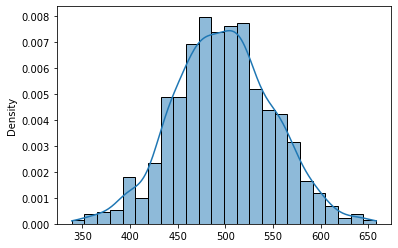

In [5]:
# visualize the sample means
sns.histplot(sample_means,kde=True,stat='density');

Wow! When we plot the distribution of sample means, it appears that we may have a normal distribution! Let's confirm with the test for normality.

**Test for Normality**

In [6]:
stats.normaltest(sample_means)

NormaltestResult(statistic=0.14786790715227197, pvalue=0.9287330313111472)

Our p-value is greater than 0.05 so we accept the null hypothesis that yes, indeed, our distribution of sample means is normal! 

# Example Real Data: Movie Runtimes
Now let's consider an example from a familiar dataset.  We have been working with the movie runtimes data, and will now explore it in the context of the central limit theorem.  We will filter the data as we have done previously to include 2000-2020 and to drop data with null runtimes.

**Define our population**

In [7]:
## Load the data
movie_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSRzwOVZswzLMacwVwQJLB4WnDZIy46gxMxZzGtJs0FKCLhwXDb8kUI1wmo9-Nll0oo1EpgjFbBoUEV/pub?output=csv"
df = pd.read_csv(movie_url,index_col=0,parse_dates=['release_date'])
## Filter out movie population of interest and remove nulls
## keeping only movies released after 2000 and before 2020
df = df[(df['release_date'] > "2000") & (df['release_date'] <"2020")]
df = df.dropna(subset=['runtime'])
df.head(3)

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000


**Visualize the population**

Let's visualize the distribution of movie runtimes.  For our purposes, this is considered the distribution of the entire population.

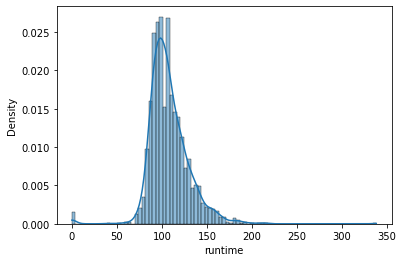

In [10]:
sns.histplot(x=df['runtime'], kde=True, stat='density');

**Test for normality**

We have previously tested this distribution for normality, but let's reconfirm here:

In [ ]:
stats.normaltest(df)

The p-value is less than 0.05 which means we reject the null hypothesis, and our data is NOT normal.

**Create the list of sample means**

As we did with our simulated population, we will now take 1000 samples from the runtimes population and create a list of the mean from each sample.  

In [ ]:
np.random.seed(42)
sample_means = []
for i in range(1000):   
  sample = np.random.choice(df,size=30,replace=False)    
  sample_means.append( np.mean(sample))
sample_means[0:5]

We only look at five of the means, but we will include all of them in our distribution plot.

**Plot the sample means**

In [ ]:
sns.histplot(sample_means,kde=True,stat='density');

The sample means has the potential to be normally distributed.

**Test for Normality**

Let's do the test for normality:

In [ ]:
stats.normaltest(sample_means)

The p-value is greater than 0.5 which means that we accept the null hypothesis and conclude that our sample means distribution is normally distributed!

# Why this matters for Data Science
- The fact that as long as the population is greater than 30, ANY distribution's sample means will form a normal distribution shows that REGARDLESS of what the original data LOOKS like, we can use the PDF of a normal distribution to get p-values comparing sample means!
- This is a liberating realization that allows us to push onward in our hypothesis testing journey!